In [ ]:
import pandas as pd

file_path = "/content/Online Retail - Online Retail.csv"
df = pd.read_csv(file_path)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

df = pd.read_csv("/content/Online Retail - Online Retail.csv")

# Drop missing CustomerID values
df = df[pd.notnull(df['CustomerID'])]

# Filter only positive quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Monetary
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Reference date for recency calculation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Remove outliers
rfm = rfm[(rfm['Monetary'] > 0)]

# Scale the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)



<ipython-input-13-737c56e03072>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


K-Means


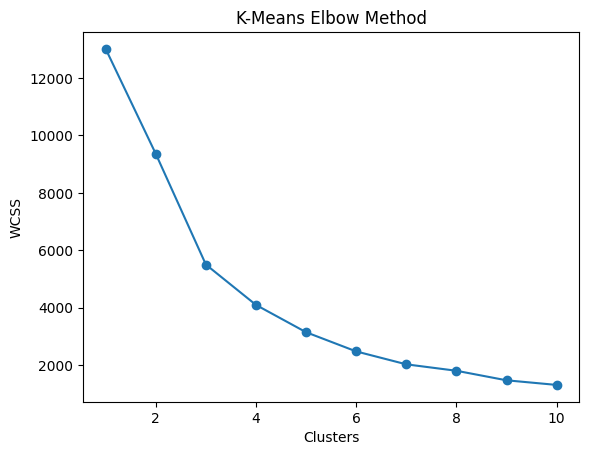

K-Means Silhouette Score: 0.616212846765192
K-Means Davies-Bouldin Index: 0.7533624887695072


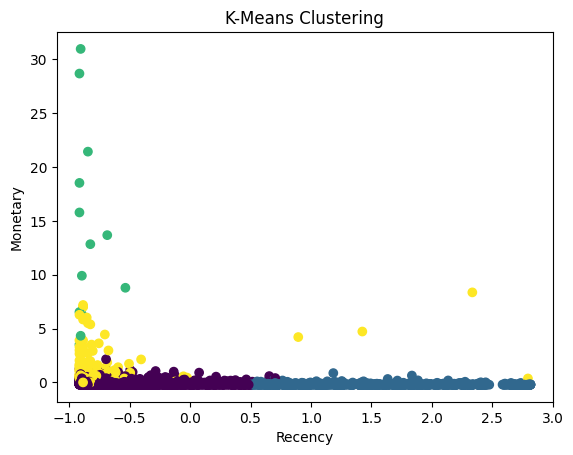

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('K-Means Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans (assume 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)

print("K-Means Silhouette Score:", silhouette_score(rfm_scaled, kmeans_labels))
print("K-Means Davies-Bouldin Index:", davies_bouldin_score(rfm_scaled, kmeans_labels))

# Visualize KMeans
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 2], c=kmeans_labels, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('K-Means Clustering')
plt.show()


HIERARCHICAL CLUSTERING

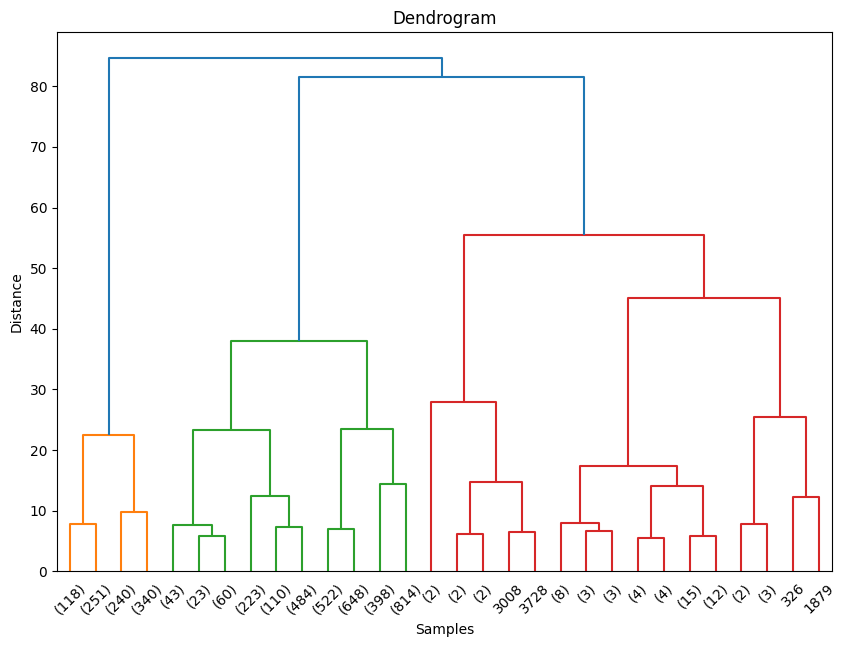

Hierarchical Silhouette Score: 0.6065329601634818
Hierarchical Davies-Bouldin Index: 0.7570399727948356


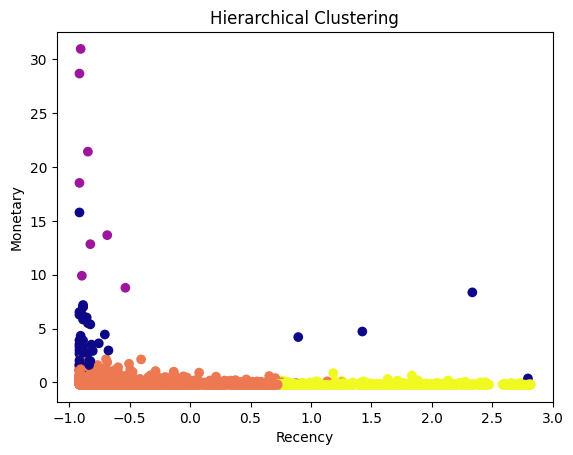

In [ ]:
linked = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
hc_labels = agglo.fit_predict(rfm_scaled)

print("Hierarchical Silhouette Score:", silhouette_score(rfm_scaled, hc_labels))
print("Hierarchical Davies-Bouldin Index:", davies_bouldin_score(rfm_scaled, hc_labels))

# Visualize Hierarchical
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 2], c=hc_labels, cmap='plasma')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Hierarchical Clustering')
plt.show()


In [ ]:
print("Performance Comparison:")
print("-" * 40)
print(f"K-Means Silhouette Score:         {silhouette_score(rfm_scaled, kmeans_labels):.4f}")
print(f"K-Means Davies-Bouldin Index:     {davies_bouldin_score(rfm_scaled, kmeans_labels):.4f}")
print("-" * 40)
print(f"Hierarchical Silhouette Score:    {silhouette_score(rfm_scaled, hc_labels):.4f}")
print(f"Hierarchical Davies-Bouldin Index:{davies_bouldin_score(rfm_scaled, hc_labels):.4f}")


Performance Comparison:
----------------------------------------
K-Means Silhouette Score:         0.6162
K-Means Davies-Bouldin Index:     0.7534
----------------------------------------
Hierarchical Silhouette Score:    0.6065
Hierarchical Davies-Bouldin Index:0.7570
